In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [0]:
path = '/content/Instagram-Hashtags.csv'

In [0]:
data = pd.read_csv(path)

In [5]:
data.head()

,post_id,shortcode,like_count,comment_count,engagement_rate,video_view_count,hashtags,db_posted_timestamp,db_captured_timestamp
0,2128539253687588256,B2KFyx6hhWg,13,0,4.362416,0.0,"#hi,#highschool,#smile,#ily,#prayingmantis,#mo...",2019-09-08 16:54:33 UTC,2019-09-09 00:31:38.614529 UTC
1,2128691762114665862,B2KoeEdJR2G,15,0,1.480750,0.0,"#red,#redbackground,#rock,#silhouette,#me,#bla...",2019-09-08 21:57:34 UTC,2019-09-09 00:30:19.732993 UTC
2,2088573941412949325,Bz8Gu8ZDm1N,7,0,43.750000,0.0,"#daughterart,#daughterdrawing,#pencildrawing,#...",2019-07-15 13:30:37 UTC,2019-09-03 19:59:31.976961 UTC
3,2127018180275810723,B2Er8P6IzGj,102,0,4.267782,0.0,"#hypebeast,#travelawesome,#canarias,#theweekin...",2019-09-06 14:32:27 UTC,2019-09-09 00:37:41.788161 UTC
4,2125911386874857867,B2AwSSOokmL,61,0,2.552301,0.0,"#portrait,#hypebeast,#travelawesome,#estrenc,#...",2019-09-05 01:53:27 UTC,2019-09-09 00:37:41.788161 UTC


In [0]:
documents = data['hashtags']

In [0]:
#documents

In [0]:
vectorizer = TfidfVectorizer(stop_words='english')

In [0]:
X = vectorizer.fit_transform(documents)

  (0, 10811)	0.3511466944973259
  (0, 11773)	0.26559571751000305
  (0, 19142)	0.2436848836965398
  (0, 19116)	0.20614746551225227
  (0, 21073)	0.18635071906083353
  (0, 21068)	0.23940018976291733
  (0, 18162)	0.2876678669396136
  (0, 18160)	0.23106581823193334
  (0, 21856)	0.3624933395139038
  (0, 13689)	0.3191622986043017
  (0, 24866)	0.22705134457591725
  (0, 12783)	0.3191622986043017
  (0, 12751)	0.2990145119561915
  (1, 11375)	0.28209697602663747
  (1, 26561)	0.30405989081071366
  (1, 22823)	0.30405989081071366
  (1, 3754)	0.20540570403343633
  (1, 8824)	0.26013406124256133
  (1, 22418)	0.30405989081071366
  (1, 6490)	0.2643651086729819
  (1, 6104)	0.28209697602663747
  (1, 12386)	0.17485990281244154
  (1, 12907)	0.20684621519143168
  (1, 3435)	0.19576652684315737
  (1, 24552)	0.29121240925549485
  :	:
  (10818, 26252)	0.17677110759973255
  (10818, 30298)	0.37847982955087645
  (10818, 14341)	0.1674199940546219
  (10818, 12491)	0.18923991477543822
  (10818, 19223)	0.1503144480804371

In [34]:
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=8, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 motivation
 entrepreneur
 success
 mindset
 inspiration
 business
 work
 entrepreneurship
 motivationalquotes
 startup
Cluster 1:
 designyourworkspace
 deskgoals
 setupinspiration
 desksituation
 deskinspiration
 homeoffice
 workspace
 officeinspo
 deskinspo
 workstation
Cluster 2:
 100daysofcode
 ad
 repost
 tbt
 acreativedc
 design
 digitalart
 art
 batman
 summer
Cluster 3:
 art
 drawing
 illustration
 sketch
 artist
 digitalart
 draw
 artwork
 artistsoninstagram
 comics
Cluster 4:
 photography
 fashion
 photooftheday
 love
 instagood
 beautiful
 style
 travel
 nature
 explore
Cluster 5:
 womenintech
 girlswhocode
 womenwhocode
 programmer
 coder
 womeninstem
 girlsintech
 peoplewhocode
 codergirl
 developer
Cluster 6:
 developer
 programmer
 programming
 coding
 webdeveloper
 javascript
 coder
 code
 devlife
 codinglife
Cluster 7:
 marvel
 comics
 marvelcomics
 spiderman
 igcomicfamily
 comicbooks
 dccomics
 comicbook
 batman
 avengers


In [0]:
#print("\n") 
#print("Prediction") 
#Y = vectorizer.transform(df['textfield'].astype('U')) 
#prediction = model.predict(Y) 
#print(prediction)

In [29]:
Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

[0]


In [30]:
Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

[0]


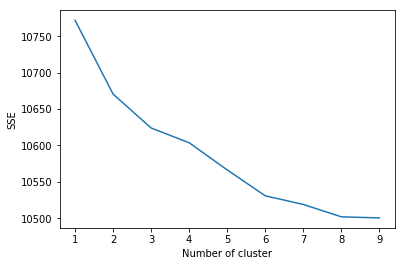

In [33]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    #data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()